In [1]:
# Import libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sarracen as src
import numpy as np

/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/

# 3D Init Setup

In [2]:
n = 16*16*16
dm = 1./n
eta = 1.2 

In [4]:
sdf_ini = src.read_csv('../Data/initial_distribution/sedov_blast_wave.csv')
sdf_ini.params={'mass':dm, 'hfact':eta}
sdf_ini.calc_density()

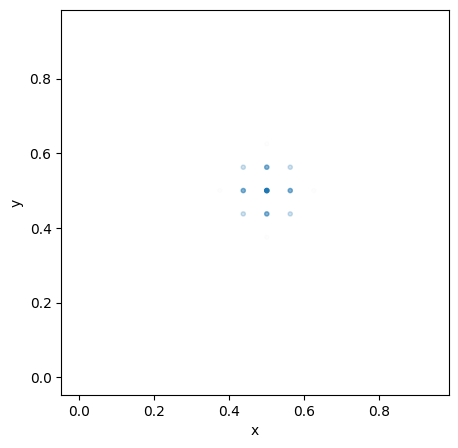

In [5]:
fig, ax = plt.subplots(figsize=(5,5))

alph = "u"
x1="x"
x2="y"

ax.scatter(sdf_ini[x1], sdf_ini[x2], marker=".", alpha=sdf_ini[alph]/np.max(sdf_ini[alph]))

ax.set_xlabel(x1)
ax.set_ylabel(x2)

plt.show()

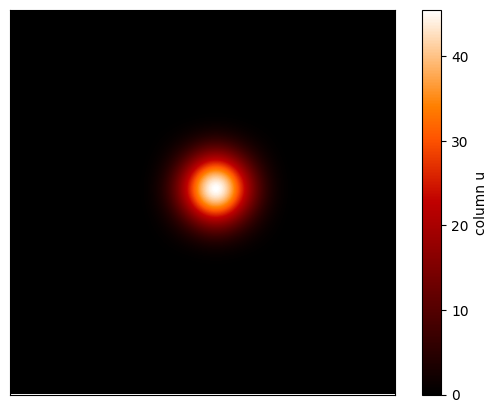

In [6]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf_ini.render('u', ax=ax, rotation=[0,0,0])

# Initial Setup

In [15]:
sdf = src.read_csv('../Data/results/sedov_blast_wave/8.csv')
sdf.params={'mass':dm, 'hfact':eta}
sdf.calc_density()
sdf

,x,y,z,vx,vy,vz,h,u,rho
0,1.0000,1.0000,1.0000,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.074979,0.0,1.000825
1,0.0625,1.0000,1.0000,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.074979,0.0,1.000825
2,0.1250,1.0000,1.0000,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.074979,0.0,1.000825
3,0.1875,1.0000,1.0000,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.074979,0.0,1.000825
4,0.2500,1.0000,1.0000,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.074979,0.0,1.000825
...,...,...,...,...,...,...,...,...,...
4091,0.6875,0.9375,0.9375,1.000000e-16,6.000000e-16,6.000000e-16,0.074979,0.0,1.000825
4092,0.7500,0.9375,0.9375,0.000000e+00,0.000000e+00,0.000000e+00,0.074979,0.0,1.000825
4093,0.8125,0.9375,0.9375,0.000000e+00,0.000000e+00,0.000000e+00,0.074979,0.0,1.000825
4094,0.8750,0.9375,0.9375,0.000000e+00,0.000000e+00,0.000000e+00,0.074979,0.0,1.000825


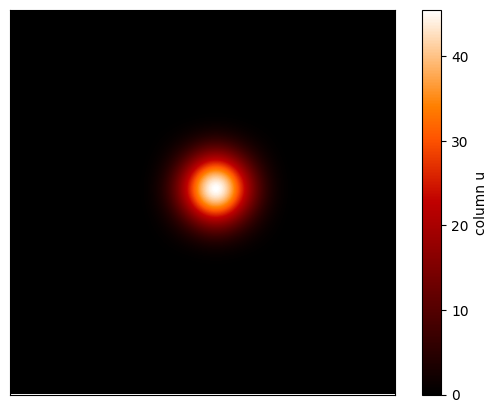

In [16]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf_ini.render('u', ax=ax, rotation=[0,0,0])

# Final Setup

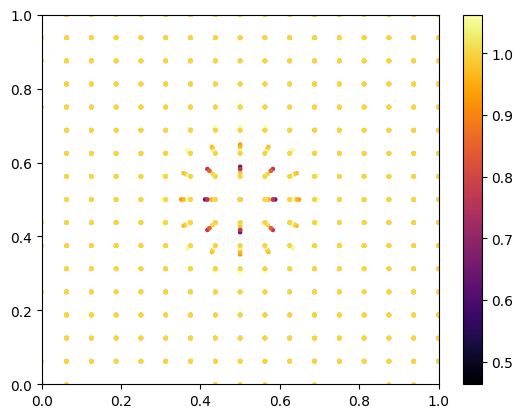

In [17]:
plt.scatter(sdf['x'], sdf['y'], c=sdf['rho'], cmap='inferno', s=5)
# Add a colorbar
plt.colorbar()
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

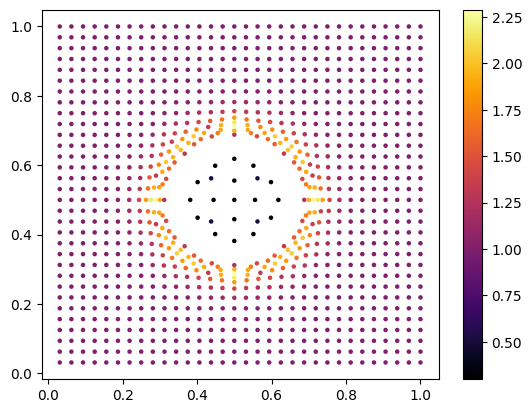

In [14]:
plt.scatter(sdft['x'], sdft['y'], c=sdft['rho'], cmap='inferno', s=5)
# Add a colorbar
plt.colorbar()
plt.show()

# Angular Momentum's Conservation

In [45]:
# Angular Momentum
def angular_momentum(x, y, vx, vy):
    return x*vy - y*vx

In [46]:
T = 24
time = range(0, T)
ang_mom = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/sedov_blast_wave/' + str(ii) + ".csv")
    df.params={'mass': 2.0/df.shape[0]}
    ang_mom[ii-1] = np.sum(angular_momentum(df['x'], df['y'], df['vx'], df['vy']))

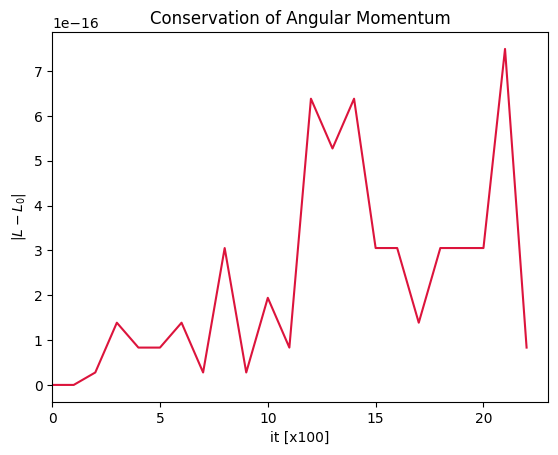

In [47]:
plt.plot(time[:-1], np.abs(ang_mom[:-1]-ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel("$|L-L_0|$")
plt.xlim(0, T-1)
plt.show()

# Conservation of Energy

In [28]:
# Energy
def energy(vx, vy, u):
    return 0.5*(vx*vx + vy*vy)+u

In [48]:
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/sedov_blast_wave/' + str(ii) + ".csv")
    energ[ii-1] = np.sum(energy(df['vx'], df['vy'], df['u']))

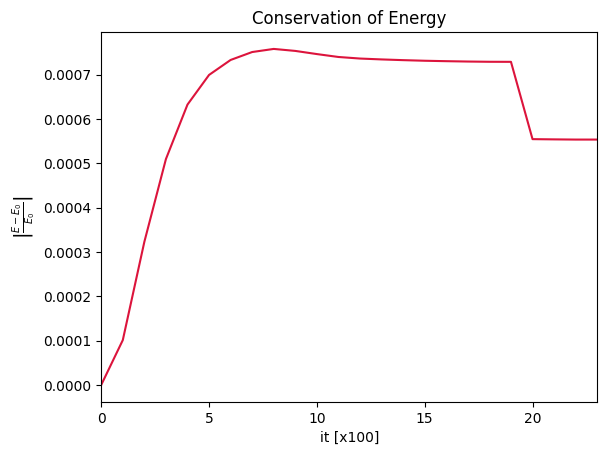

In [49]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='crimson')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T-1)
plt.show()

# Density distribution

In [40]:
rad = np.sqrt((sdf["x"]-0.5)**2 + (sdf["y"]-0.5)**2)

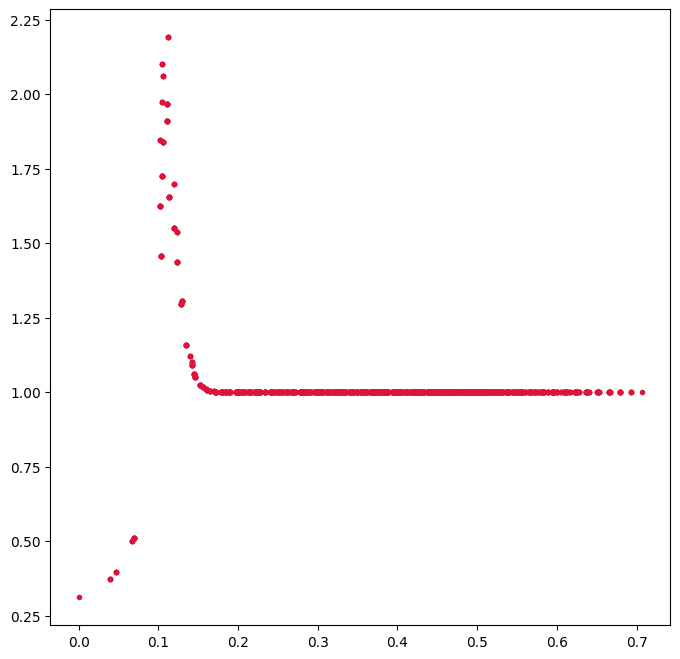

In [41]:
fig = plt.figure(figsize=(8,8))
plt.plot(rad, sdf['rho'], ".", color="crimson")
#plt.ylim(0.95,1.02)
plt.show()